In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load both CSV files (from data folder)
customers = pd.read_csv("data/customers.csv")
transactions = pd.read_csv("data/transactions.csv")


In [6]:
print("Customers data shape:", customers.shape)
print("Transactions data shape:", transactions.shape)

Customers data shape: (322, 2)
Transactions data shape: (1200, 7)


In [7]:
merged = pd.merge(transactions, customers, on="CustomerID", how="inner")
print("Merged data shape:", merged.shape)

Merged data shape: (1314, 8)


In [8]:
print("\nMissing values before cleaning:\n", merged.isnull().sum())
merged.dropna()
merged.drop_duplicates()
print("\nMissing values after cleaning:\n", merged.isnull().sum())


Missing values before cleaning:
 InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     228
Country          0
dtype: int64

Missing values after cleaning:
 InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     228
Country          0
dtype: int64


In [9]:
if 'InvoiceDate' in merged.columns:
    merged['InvoiceDate'] = pd.to_datetime(merged['InvoiceDate'], errors='coerce')

In [10]:
print("\nSummary Statistics")
print(merged.describe())


Summary Statistics
          InvoiceNo     StockCode     Quantity                    InvoiceDate  \
count  1.314000e+03   1314.000000  1314.000000                           1314   
mean   5.381716e+06  10097.506849    12.125571  2011-06-03 22:59:43.561643776   
min    5.361000e+06  10000.000000    -5.000000            2010-12-01 00:00:00   
25%    5.371291e+06  10044.000000     3.000000            2011-03-08 06:00:00   
50%    5.381699e+06  10097.000000    12.000000            2011-06-06 00:00:00   
75%    5.391926e+06  10146.000000    21.000000            2011-09-03 18:00:00   
max    5.402192e+06  10199.000000    29.000000            2011-11-30 00:00:00   
std    1.405917e+04     58.159159    10.383444                            NaN   

         UnitPrice    CustomerID  
count  1314.000000   1086.000000  
mean     11.382877  10163.214549  
min       0.650000  10000.000000  
25%       2.832500  10079.000000  
50%       6.520000  10169.000000  
75%      15.360000  10245.750000  
max  

In [14]:
print("\n Correlation Matrix")
# Select only numeric columns before computing correlation
numeric_df = merged.select_dtypes(include=['number'])
print(numeric_df.corr())



 Correlation Matrix
            InvoiceNo  StockCode  Quantity  UnitPrice  CustomerID
InvoiceNo    1.000000   0.019027  0.063039   0.021553   -0.003030
StockCode    0.019027   1.000000 -0.013362   0.030455    0.006359
Quantity     0.063039  -0.013362  1.000000   0.009620   -0.011397
UnitPrice    0.021553   0.030455  0.009620   1.000000   -0.052622
CustomerID  -0.003030   0.006359 -0.011397  -0.052622    1.000000


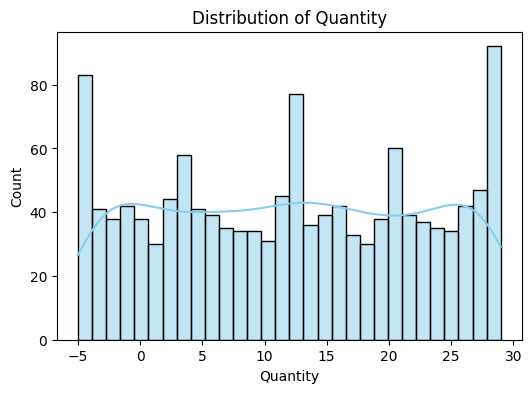

In [15]:
# 1. Distribution of Quantity
plt.figure(figsize=(6,4))
sns.histplot(merged['Quantity'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of Quantity")
plt.show()


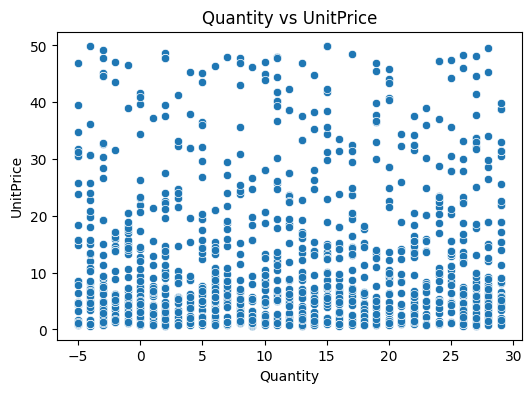

In [16]:

# 2. Scatter plot of Quantity vs UnitPrice
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='UnitPrice', data=merged)
plt.title("Quantity vs UnitPrice")
plt.show()

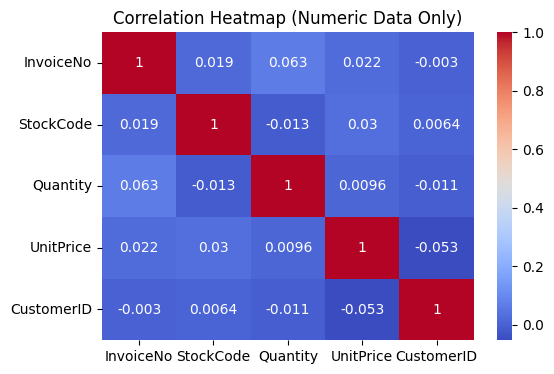

In [ ]:
# 3. Correlation heatmap
# Select only numeric columns
numeric_data = merged.select_dtypes(include=['number'])
plt.figure(figsize=(6,4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Data Only)")
plt.show()


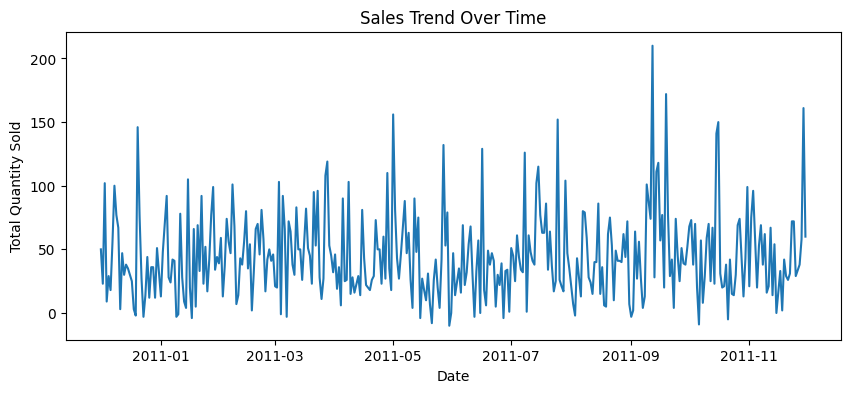

In [19]:
# 4. Sales trend over time (if InvoiceDate exists)
if 'InvoiceDate' in merged.columns:
    daily_sales = merged.groupby(merged['InvoiceDate'].dt.date)['Quantity'].sum()
    plt.figure(figsize=(10,4))
    plt.plot(daily_sales)
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Quantity Sold")
    plt.show()
